# Principal Component Analysis (PCA)
## Importações

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from funcoes_cluster.funcoes_pca import imprime_variancia_explicada
from funcoes_cluster.funcoes_pca import normaliza_dados
from funcoes_cluster.funcoes_pca import plota_2d
from funcoes_cluster.funcoes_pca import projeta_dados
from funcoes_cluster.funcoes_pca import separa_tipo

## Parâmetros

In [2]:
N_HEAD = 10
TAM_AMOSTRA = 100
plt.rcParams['figure.figsize'] = [12, 10]

## Lendo o arquivo de dados

In [3]:
pasta_dados = Path('.').resolve().parents[1] / 'dados'
arquivo = pasta_dados / 'vinhos.csv'

vinhos_df = pd.read_csv(arquivo)
vinhos_df.head(N_HEAD)

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Separando os dados

In [4]:
tintos_df, qual_tintos = separa_tipo(vinhos_df, 'red')
tintos_df.head(N_HEAD)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [5]:
qual_tintos.head(N_HEAD)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
dtype: int64

In [6]:
brancos_df, qual_brancos = separa_tipo(vinhos_df, 'white')
brancos_df.head(N_HEAD)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [7]:
qual_brancos.head(N_HEAD)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
dtype: int64

## Normalizando os dados

In [8]:
tintos_normal, _ = normaliza_dados(tintos_df)
tintos_normal.head(N_HEAD)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294


In [9]:
brancos_normal, _ = normaliza_dados(brancos_df)
brancos_normal.head(N_HEAD)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008
7,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
8,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
9,1.475751,-0.577879,0.791757,-0.964483,-0.081131,-0.429751,-0.220283,-0.076030,0.210175,-0.349184,0.394746


## PCA: 2 Componentes Principais

In [10]:
tintos_proj_2d, pca_tintos = projeta_dados(2, tintos_normal, qual_tintos)
tintos_proj_2d.head(N_HEAD)

,x_1,x_2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5
5,-1.583707,0.569195,5
6,-1.101464,0.608015,5
7,-2.248708,-0.416835,7
8,-1.086887,-0.308569,7
9,0.654790,1.665207,5


In [11]:
imprime_variancia_explicada(pca_tintos)

Percentual da variância explicada pelas componentes principais

Componente 1: 28.17%
Componente 2: 17.51%

Total:        45.68%


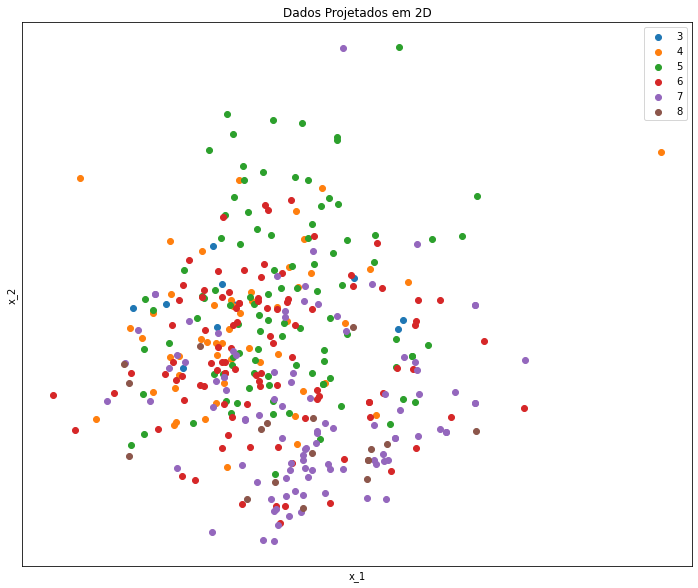

In [12]:
plota_2d(tintos_proj_2d, TAM_AMOSTRA)

In [13]:
brancos_proj_2d, pca_brancos = projeta_dados(2, brancos_normal, qual_brancos)
brancos_proj_2d.head(N_HEAD)

,x_1,x_2,quality
0,3.676944,-0.545233,6
1,-0.644588,0.430770,6
2,0.155291,-1.189800,6
3,1.455374,0.099680,6
4,1.455374,0.099680,6
5,0.155291,-1.189800,6
6,0.073836,0.829319,6
7,3.676944,-0.545233,6
8,-0.644588,0.430770,6
9,-0.558664,-1.326730,6


In [14]:
imprime_variancia_explicada(pca_brancos)

Percentual da variância explicada pelas componentes principais

Componente 1: 29.29%
Componente 2: 14.32%

Total:        43.61%


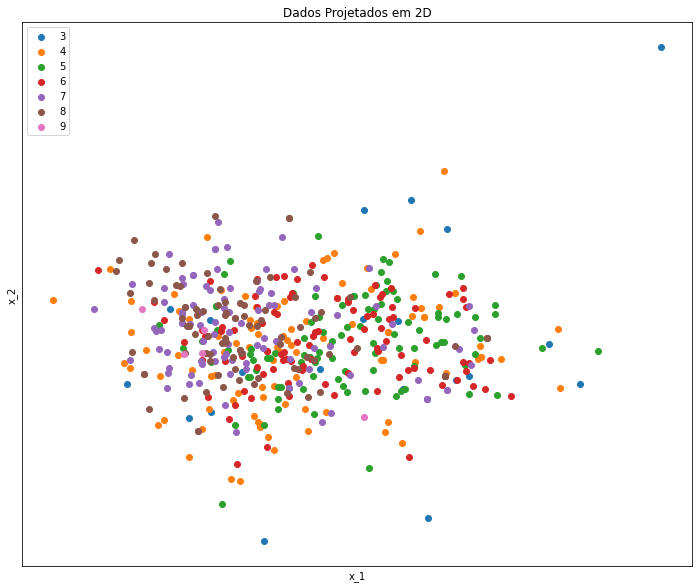

In [15]:
plota_2d(brancos_proj_2d, TAM_AMOSTRA)